In [30]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from matplotlib.animation import FuncAnimation, PillowWriter
from itertools import chain
import itertools

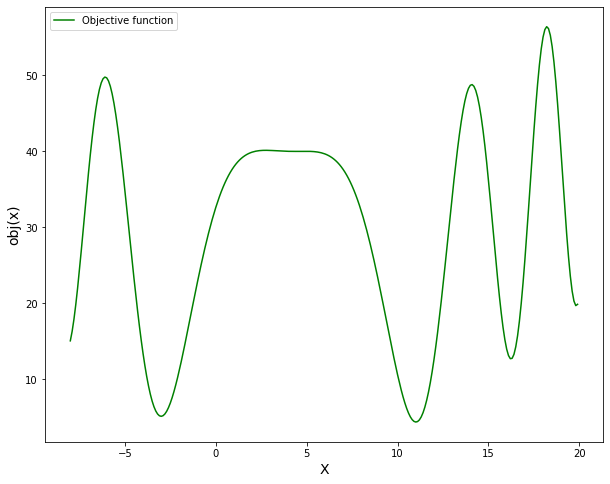

In [51]:
# Define the objective function to maximize
def objective(x):
    return 20*(2+np.cos((x/4-1)**2) + np.sin(x/10-2))

# Define interval of X and calculate the value of the objective function
X = np.arange(-8,20,0.10)
y = objective(X)

# Plot objective function
plt.figure(figsize=(10,8))
plt.plot(X,y, label ='Objective function', color = 'green')
plt.xlabel('X', fontsize = 14)
plt.ylabel('obj(x)', fontsize = 14)
plt.legend()
plt.show()

In [15]:
# Set hyperparameters value
iterations = 600
Tmax = 100
Tmin = 0.01

interval = [np.min(X), np.max(X)]

# Simulated annealing function
def simulated_annealing(X_interval, objective_function, iterations):
    # Initialize empty lists to collect data for plotting
    path_X = []
    paty_y = []
    temp = []
    
    # Pick a random starting candidate and evaluate the obj function
    current_point = np.random.random() * (X_interval[1] - X_interval[0]) - np.abs(X_interval[0])
    current_obj_value = objective_function(current_point)
    
    # Appending the initial candidate information
    path_X.append(current_point)
    paty_y.append(current_obj_value)

    # Calculate the DT based on 
    DT = (Tmax - Tmin) / iterations
    
    # Assign Tmax to T
    T = Tmax
    
    # Running the algorithm - main loop
    for i in range(iterations):
        temp.append(T)
        
        # Propose a new candidate and evaluate the obj function
        next_point = np.random.random() * (X_interval[1] - X_interval[0]) - np.abs(X_interval[0])
        next_obj = objective_function(next_point)
        
        # Compare value of obj function for new and current candidate
        diff = next_obj - current_obj_value
        
        # Accept the candidate if diff > 0 (--> new candidate is better)
        if diff > 0:
            current_point = next_point
            current_obj_value = next_obj
            path_X.append(next_point)
            paty_y.append(next_obj)
        
        # Otherwise, calculate probability of acceptance, accept/reject the new candidate 
        else:
            p = np.random.random()
            acceptance = np.exp(diff / T)
            if acceptance  >  p:
                # New candidate becomes the current candidate  
                current_point = next_point
                current_obj_value = next_obj
                path_X.append(next_point)
                paty_y.append(next_obj)
            else:
                # No update: the current candidate stays the same
                path_X.append(current_point)
                paty_y.append(current_obj_value)
        
        # Reduce the value of T
        T -= DT
    
    # Return result
    return [current_point, current_obj_value], [path_X, paty_y, temp]

In [27]:
# Run simulated annealing
result, plot_data = simulated_annealing(interval, objective, iterations)

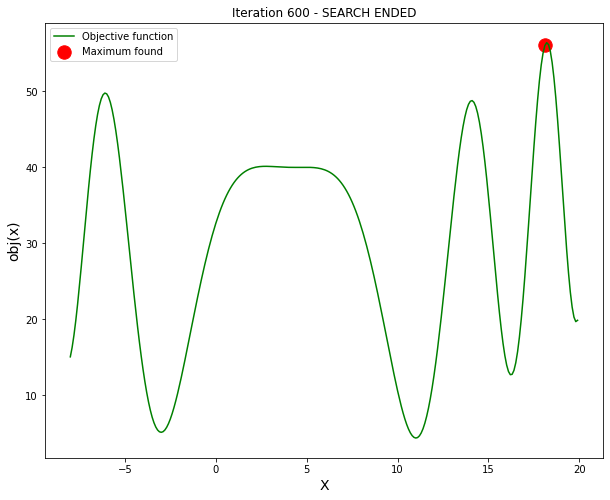

In [55]:
# Display which maximum was found
title = f'Iteration {iterations  } - SEARCH ENDED'
plt.figure(figsize=(10,8))
plt.title(title)
plt.plot(X,y, label ='Objective function', color = 'green')
plt.scatter(result[0], result[1] , label ='Maximum found', color = 'red', s =180)
plt.xlabel('X', fontsize = 14)
plt.ylabel('obj(x)', fontsize = 14)
plt.legend()
plt.show()

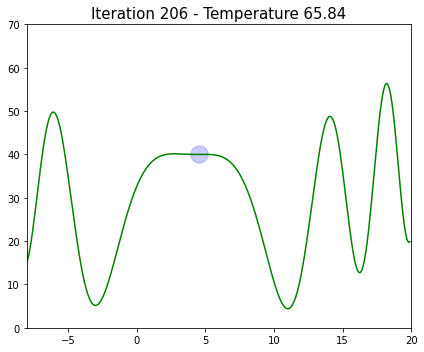

In [56]:
# Create the animation
fig, ax = plt.subplots(figsize=(6,5))
fig.set_tight_layout(True)
location = ax.scatter(plot_data[0][0], plot_data[1][0], color='blue', s =300, alpha=0.2)
ax.plot(X,y, label ='Objective function', color = 'green')
ax.set_xlim([-8,20])
ax.set_ylim([0,70])

# Create custom range object
def ranges(i):
    for a in i:
        yield a
concatenated = chain(range(1, iterations), ranges([iterations - 1 for _ in range(50)]))

# Function to create the plots
def animate(i):
    t = plot_data[2][i]
    title = f'Iteration {i+1} - Temperature {t:.2f}'
    ax.set_title(title, fontsize =15)
    X = [plot_data[0][i], plot_data[1][i]]
    
    # Update the plot 
    location.set_offsets(X)
    if i != iterations-1:
        location.set_alpha(0.2)
        location.set_color('blue')
    
    if i == iterations-1:
        title = f'Iteration {i+1} - Temperature {t:.2f} - SEARCH ENDED'
        ax.set_title(title, fontsize =15)
        location.set_alpha(1)
        location.set_color('red')
    
    return ax, location

# Run the animation
anim = FuncAnimation(fig, animate, frames = concatenated,
                     interval = 60, blit=False, repeat=True, save_count = 1500)

# Save the animation
anim.save("Simulated_annealing.gif", dpi=100, writer="pillow")

#### Comparison with simple hill climbing

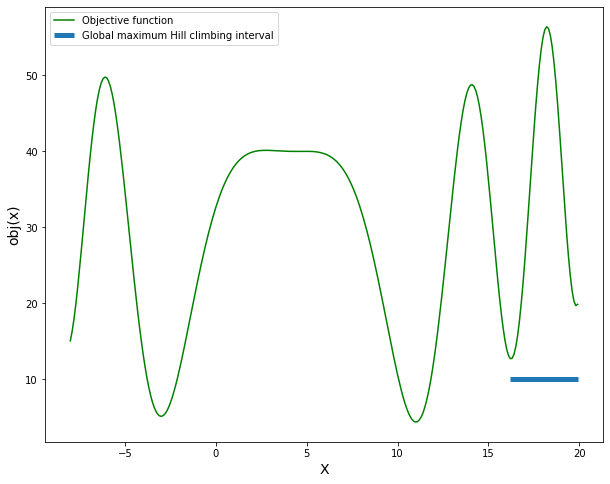

In [53]:
# Display the interval that will take simple hill climbing to the global maximum
plt.figure(figsize=(10,8))
plt.plot(X,y, label ='Objective function', color = 'green')
plt.hlines( y =10, xmin = 16.2, xmax = 19.9, linewidths= 5, label ='Global maximum Hill climbing interval')
plt.xlabel('X', fontsize = 14)
plt.ylabel('obj(x)', fontsize = 14)
plt.legend()
plt.show()